In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
deliveries_data=pd.read_csv("../input/final-dc-vs-mi/deliveries.csv")
deliveries_data.head()
deliveries_data.info()
import os
print(os.listdir("../input"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [2]:
matches_data=pd.read_csv("../input/final-dc-vs-mi/matches.csv")
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# QUES 1

In [3]:
dc_vs_mi=matches_data[['id','team1','team2','winner','result','toss_winner','toss_decision','season']]
dc_vs_mi=dc_vs_mi[(dc_vs_mi['team1']=='Mumbai Indians') & (dc_vs_mi['team2'] == 'Delhi Capitals') | (dc_vs_mi['team1']=='Delhi Capitals') & (dc_vs_mi['team2'] == 'Mumbai Indians')]
dc_vs_mi

,id,team1,team2,winner,result,toss_winner,toss_decision,season
23,24,Mumbai Indians,Delhi Capitals,Mumbai Indians,normal,Delhi Capitals,field,2017
43,44,Mumbai Indians,Delhi Capitals,Mumbai Indians,normal,Delhi Capitals,field,2017
81,82,Mumbai Indians,Delhi Capitals,Mumbai Indians,normal,Delhi Capitals,field,2008
108,109,Mumbai Indians,Delhi Capitals,Delhi Capitals,normal,Delhi Capitals,field,2008
149,150,Mumbai Indians,Delhi Capitals,Delhi Capitals,normal,Mumbai Indians,bat,2009
169,170,Mumbai Indians,Delhi Capitals,Delhi Capitals,normal,Delhi Capitals,field,2009
182,183,Mumbai Indians,Delhi Capitals,Mumbai Indians,normal,Delhi Capitals,field,2010
220,221,Mumbai Indians,Delhi Capitals,Mumbai Indians,normal,Mumbai Indians,bat,2010
237,238,Delhi Capitals,Mumbai Indians,Mumbai Indians,normal,Delhi Capitals,bat,2011
281,282,Mumbai Indians,Delhi Capitals,Mumbai Indians,normal,Delhi Capitals,field,2011


In [4]:
Results=dc_vs_mi['winner'].value_counts()
Results

Delhi Capitals    12
Mumbai Indians    12
Name: winner, dtype: int64

In [5]:
total_matches=dc_vs_mi['id'].nunique()
total_matches

24

Text(0, 12, '12')

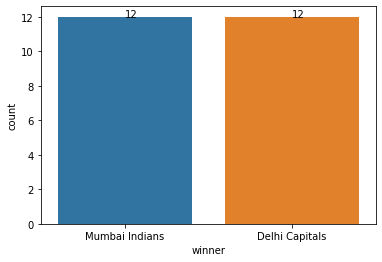

In [6]:
sns.countplot(dc_vs_mi['winner'])

plt.text(1,12,str(12))
plt.text(0,12,str(12))

In [7]:
toss_results=dc_vs_mi['toss_decision'].value_counts()
toss_results

field    15
bat       9
Name: toss_decision, dtype: int64

In [8]:
matches_played=pd.concat([matches_data['team1'],matches_data['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=matches_data['winner'].value_counts().reset_index()['winner']

matches_played.set_index('Team',inplace=True)
matches_played.reset_index().head(8)


,Team,Total Matches,wins
0,Mumbai Indians,187,109
1,Royal Challengers Bangalore,180,100
2,Kolkata Knight Riders,178,92
3,Delhi Capitals,177,84
4,Kings XI Punjab,176,82
5,Chennai Super Kings,164,77
6,Rajasthan Royals,147,75
7,Sunrisers Hyderabad,108,58


In [9]:
win_percentage = round(matches_played['wins']/matches_played['Total Matches'],3)*100
win_percentage.head(8)

Team
Mumbai Indians                 58.3
Royal Challengers Bangalore    55.6
Kolkata Knight Riders          51.7
Delhi Capitals                 47.5
Kings XI Punjab                46.6
Chennai Super Kings            47.0
Rajasthan Royals               51.0
Sunrisers Hyderabad            53.7
dtype: float64

In [10]:
total=matches_data.groupby('team1')['id'].count() + matches_data.groupby('team2')['id'].count()
total

team1
Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                 177
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
Name: id, dtype: int64

Text(0.5, 1.0, 'WIN PERCENTAGE BY TEAMS')

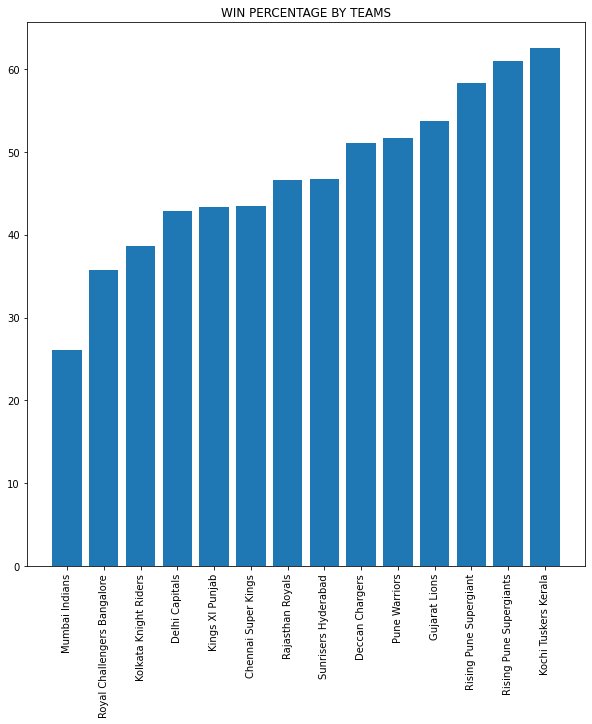

In [11]:
plt.figure(figsize=(10,10))
plt.bar(win_percentage.index,((matches_data['winner'].value_counts()/ total)*100).sort_values())
plt.xticks(rotation=90)
plt.title('WIN PERCENTAGE BY TEAMS')

In [13]:
last_3=dc_vs_mi[dc_vs_mi['season']>2016]
last_3['winner'].value_counts()

Delhi Capitals    3
Mumbai Indians    3
Name: winner, dtype: int64

Text(0, 3, '3')

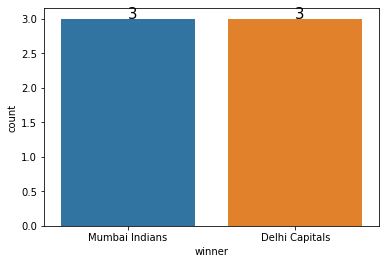

In [15]:
sns.countplot(last_3['winner'],data=last_3)
plt.text(1,3,str(3),fontsize=15)
plt.text(0,3,str(3),fontsize=15)

In [ ]:
#from above analysis both teams have won same no. of matches ,also last 3 seasons results shows both teams won same no. of matches but if we analysed MI record in final matches.They are far better than DC(playing their first final).So I will go for MI. 

# QUES 2

In [18]:
rabada_stats=deliveries_data[['match_id','batting_team','bowler','player_dismissed']]
rabada_stats=rabada_stats[(rabada_stats['bowler'] == 'K Rabada') & (rabada_stats['batting_team'] == 'Mumbai Indians')]
rabada_stats=rabada_stats.fillna(0)
rabada_stats['player_dismissed'] = rabada_stats['player_dismissed'].apply(lambda x: 'NO WICKET'  if x==0 else 'WICKET')
rabada_stats

,match_id,batting_team,bowler,player_dismissed
5512,24,Mumbai Indians,K Rabada,NO WICKET
5513,24,Mumbai Indians,K Rabada,NO WICKET
5514,24,Mumbai Indians,K Rabada,NO WICKET
5515,24,Mumbai Indians,K Rabada,NO WICKET
5516,24,Mumbai Indians,K Rabada,NO WICKET
...,...,...,...,...
172877,11325,Mumbai Indians,K Rabada,WICKET
172878,11325,Mumbai Indians,K Rabada,NO WICKET
172879,11325,Mumbai Indians,K Rabada,NO WICKET
172880,11325,Mumbai Indians,K Rabada,NO WICKET


In [19]:
rabada_stats['player_dismissed'].value_counts()

NO WICKET    100
WICKET         7
Name: player_dismissed, dtype: int64

In [26]:
#From above 
rabada_wickets_vs_MI=7

In [27]:
rabada_matches_vs_MI=rabada_stats['match_id'].nunique()
rabada_matches_vs_MI

4

In [28]:
rabada_wickets_vs_MI_per_match=rabada_wicket_vs_MI/rabada_matches_vs_MI
rabada_wickets_vs_MI_per_match

1.75

In [ ]:
# SO RABADA WILL TAKE 2 WICKET (ROUNDOFF)

# QUES 3

In [29]:
hardik_stats=deliveries_data[['match_id','bowling_team','batsman','batsman_runs','ball','over']]
hardik_stats=hardik_stats[(hardik_stats['batsman'] == 'HH Pandya') & (hardik_stats['bowling_team'] == 'Delhi Capitals')]
hardik_stats

,match_id,bowling_team,batsman,batsman_runs,ball,over
5594,24,Delhi Capitals,HH Pandya,0,6,13
5595,24,Delhi Capitals,HH Pandya,0,7,13
5599,24,Delhi Capitals,HH Pandya,1,4,14
5602,24,Delhi Capitals,HH Pandya,1,1,15
5606,24,Delhi Capitals,HH Pandya,1,5,15
...,...,...,...,...,...,...
172868,11325,Delhi Capitals,HH Pandya,1,2,19
172872,11325,Delhi Capitals,HH Pandya,6,6,19
172873,11325,Delhi Capitals,HH Pandya,4,7,19
172876,11325,Delhi Capitals,HH Pandya,6,3,20


In [30]:
total_runs_hardik_vsDC=hardik_stats["batsman_runs"].sum()
total_runs_hardik_vsDC

123

In [31]:
total_matches_for_hardik_VSDC=hardik_stats['match_id'].nunique()
total_matches_for_hardik_VSDC

9

In [32]:
hardik_runs_per_match_VS_DC=total_runs_hardik_vsDC/total_matches_for_hardik_VSDC
hardik_runs_per_match_VS_DC

13.666666666666666

In [ ]:
#HARDIK PANDYA RUNS=14(ROUNDFF)

# QUES 4

In [33]:
NO_ball_data= deliveries_data[['bowling_team','batting_team','noball_runs']]
NO_ball_data=NO_ball_data[(NO_ball_data['batting_team']=='Delhi Capitals') & (NO_ball_data['bowling_team'] == 'Mumbai Indians') | (NO_ball_data['batting_team']=='Mumbai Indians') & (NO_ball_data['bowling_team'] == 'Delhi Capitals')]
NO_ball_data=NO_ball_data[(NO_ball_data['noball_runs']==1)]
NO_ball_data

,bowling_team,batting_team,noball_runs
5626,Delhi Capitals,Mumbai Indians,1
19155,Delhi Capitals,Mumbai Indians,1
19265,Mumbai Indians,Delhi Capitals,1
25292,Delhi Capitals,Mumbai Indians,1
34942,Delhi Capitals,Mumbai Indians,1
34967,Delhi Capitals,Mumbai Indians,1
39796,Delhi Capitals,Mumbai Indians,1
39963,Mumbai Indians,Delhi Capitals,1
43040,Delhi Capitals,Mumbai Indians,1
43042,Delhi Capitals,Mumbai Indians,1


In [34]:
NO_ball_data.groupby('bowling_team').agg({'noball_runs':'sum'})



,noball_runs
bowling_team,
Delhi Capitals,13
Mumbai Indians,13


In [35]:
Total_NO_balls=NO_ball_data['noball_runs'].sum()
Total_NO_balls

26

In [36]:
NOball_per_match=Total_NO_balls/total_matches
NOball_per_match

1.0833333333333333

In [ ]:
# TOTAL NO BALLS=1(ROUNDOFF)

# QUES 5

In [37]:
Total_runs_data= deliveries_data[['bowling_team','batting_team','total_runs']]
Total_runs_data=Total_runs_data[(Total_runs_data['batting_team']=='Delhi Capitals') & (Total_runs_data['bowling_team'] == 'Mumbai Indians') | (Total_runs_data['batting_team']=='Mumbai Indians') & (Total_runs_data['bowling_team'] == 'Delhi Capitals')]
Total_runs_data

,bowling_team,batting_team,total_runs
5512,Delhi Capitals,Mumbai Indians,1
5513,Delhi Capitals,Mumbai Indians,5
5514,Delhi Capitals,Mumbai Indians,1
5515,Delhi Capitals,Mumbai Indians,1
5516,Delhi Capitals,Mumbai Indians,0
...,...,...,...
173000,Mumbai Indians,Delhi Capitals,6
173001,Mumbai Indians,Delhi Capitals,0
173002,Mumbai Indians,Delhi Capitals,0
173003,Mumbai Indians,Delhi Capitals,2


In [39]:
Total_runs_data.groupby('batting_team').agg({'total_runs':'sum'})

,total_runs
batting_team,
Delhi Capitals,3579
Mumbai Indians,3980


In [41]:
Total_runs_in_DC_vs_MI=Total_runs_data['total_runs'].sum()
Total_runs_in_DC_vs_MI

7559

In [42]:
Total_runs_in_DC_vs_MI_per_match=Total_runs_in_DC_vs_MI/total_matches
Total_runs_in_DC_vs_MI_per_match

314.9583333333333